
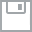
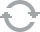
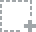
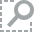
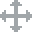
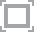
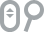
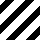
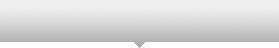
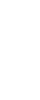
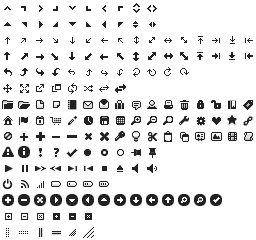
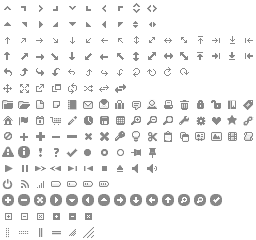
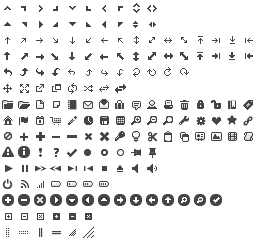
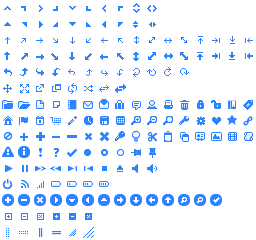
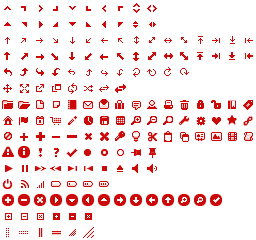
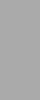
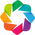
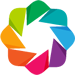

In [1]:
from collections import OrderedDict

from bokeh.sampledata import us_counties, unemployment
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool

output_notebook()

In [2]:
state = "tx"

county_xs=[
    us_counties.data[code]['lons'] for code in us_counties.data
    if us_counties.data[code]['state'] == state
]

county_ys=[
    us_counties.data[code]['lats'] for code in us_counties.data
    if us_counties.data[code]['state'] == state
]

In [3]:
import numpy as np

In [4]:
county_xs_arr = [np.array(county_xs[i])-26 for i in range(0,254)]
county_ys_arr = [np.array(county_ys[i])+4 for i in range(0,254)]




In [5]:
county_xs = list(county_xs_arr)
county_ys = list(county_ys_arr)



In [6]:
len(county_xs)
len(county_ys)

254

In [7]:
colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

county_colors = []
county_names = []
county_rates = []

In [8]:
for county_id in us_counties.data:
    if us_counties.data[county_id]['state'] != state:
        continue
    rate = unemployment.data[county_id]
    idx = min(int(rate/2), 5)
    county_colors.append(colors[idx])
    county_names.append(us_counties.data[county_id]['name'])
    county_rates.append(rate)


In [76]:
county_colors[3]

'#980043'

In [9]:
source = ColumnDataSource(
    data = dict(
        x=county_xs,
        y=county_ys,
        color=county_colors,
        name=county_names,
        rate=county_rates,
    )
)

In [10]:
#Set the figure for Bokeh plot
TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="Texas Unemployment 2009", tools=TOOLS)

p.patches('x', 'y',
    fill_color='color', fill_alpha=0.7,
    line_color="white", line_width=0.5,
    source=source)

In [ ]:
#Add interactions such as hover

hover = p.select(dict(type=HoverTool))
hover.point_policy = "follow_mouse"
hover.tooltips = OrderedDict([
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
])

In [11]:
show(p)

In [27]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
